# WeatherPy_ZM

* Observations at end of notebook

## To skip city list generation and API calls:
* run first cell (below) to import dependencies
* scroll to markdown cell containing: "Skip API calls here"
* run suceeding cells to import data from csv
* all outputs left in place for your convenience

#### Additional Resources

* list of all parameters with units http://openweathermap.org/weather-data
* standard (Kelvin for temp) api.openweathermap.org/data/2.5/find?q=London
* metric api.openweathermap.org/data/2.5/find?q=London&units=metric
* imperial api.openweathermap.org/data/2.5/find?q=London&units=imperial
* documentation https://openweathermap.org/current

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import timeit

# Import API key from within same directory
from openweather import thinger

# Incorporate citipy to determine nearest cities for each randomly generated coordinate pair
from citipy import citipy

# Output File (CSV) 
output = "city_weather.csv"

# Ranges to use for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# initialize empty lists for coordinate pairs, corresponding nearest cities (via numpy), and missing cities
lat_lngs = []
rand_cities = []
missing_cities = []
while len(rand_cities) < 1500:
    
    # create sets of random coordinates
    lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

    # set comprised of lats/lons zipped into tuples
    lat_lngs = zip(lats, lngs)

    # loops to generate set of non-duplicate cities from coordinate pairs
    for point in lat_lngs:
        city = citipy.nearest_city(point[0], point[1]).city_name

        if city not in rand_cities:
            rand_cities.append(city)

# notification of completion
print(f'done generating list: rand_cities which contains {len(rand_cities)} cities')

done generating list: rand_cities which contains 1599 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### NO MORE THAN 60 CALLS PER MINUTE

In [17]:
# initialize empty dataframe in which weather data will be stored
weather_data_df = pd.DataFrame()

# variable to convey progress of API calls
city_num = 0

# define API call variables
unit_type = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

print('### Retrieving City Weather Data ###')

# clear the variables for each parameter of interest
for city in rand_cities:
    city_name = None
    cloudiness = None
    country = None
    date = None
    humidity = None
    lat = None
    lon = None
    temp_max = None
    wind_speed = None
    sys_country = None
    sys_id = None
    sys_sunrise = None
    sys_sunset = None
    sys_type = None
    timezone = None
    city_id = None
    cod = None
    visibility = None
    weather_description = None
    weather_icon = None
    weather_id = None
    weather_main = None
    wind_deg = None
    main_pressure = None
    main_temp = None
    temp_min = None

    # instruct loop to wait for one second in each loop so 60 calls per minute limit is not exceeded
    time.sleep(1.05)

    city_num += 1

    # API query
    query_url = f'{base_url}q={city}&units={unit_type}&appid={thinger}'
    weather_json = requests.get(query_url).json()

    # if statement to handle cities not found in openweather system
    if weather_json['cod'] !='404':
        print(f'Processing city {city_num} of {len(rand_cities)} | {city}')

        # if city found, try to parse json paramters to respective variable
        try:
            city_name = weather_json['name']
            cloudiness = weather_json['clouds']['all']
            country = weather_json['sys']['country']
            date = weather_json['dt']
            humidity = weather_json['main']['humidity']
            lat = weather_json['coord']['lat']
            lon = weather_json['coord']['lon']
            temp_max = weather_json['main']['temp_max']
            wind_speed = weather_json['wind']['speed']
            sys_country = weather_json['sys']['country']
            sys_id = weather_json['sys']['id']
            sys_sunrise = weather_json['sys']['sunrise']
            sys_sunset = weather_json['sys']['sunset']
            sys_type = weather_json['sys']['type']
            timezone = weather_json['timezone']
            city_id = weather_json['id']
            cod = weather_json['cod']
            visibility = weather_json['visibility']
            weather_description = weather_json['weather'][0]['description']
            weather_icon = weather_json['weather'][0]['icon']
            weather_id = weather_json['weather'][0]['id']
            weather_main = weather_json['weather'][0]['main']
            wind_deg = weather_json['wind']['deg']
            main_pressure = weather_json['main']['pressure']
            main_temp = weather_json['main']['temp']
            temp_min = weather_json['main']['temp_min']
        except KeyError:
            pass
        # if data for particular parameter not provided, pass to next paramter
        
        # append the parameter values to the dataframe
        weather_data_df = weather_data_df.append({
            'city':city_name,
            'cloudiness':cloudiness,
            'country':country,
            'date':date,
            'humidity':humidity,
            'lat':lat,
            'lon':lon,
            'temp_max':temp_max,
            'wind_speed':wind_speed,
            'sys_country':sys_country,
            'sys_id':sys_id,
            'sys_sunrise':sys_sunrise,
            'sys_sunset':sys_sunset,
            'sys_type':sys_type,
            'timezone':timezone,
            'city_id':city_id,
            'cod':cod,
            'visibility':visibility,
            'weather_description':weather_description,
            'weather_icon':weather_icon,
            'weather_id':weather_id,
            'weather_main':weather_main,
            'wind_deg':wind_deg,
            'main_pressure':main_pressure,
            'main_temp':main_temp,
            'temp_min':temp_min},ignore_index=True)
    # if city not found in openweather system, print notification, add city to missing_cities list
    else:
        print(f'{city} not found; skipping')
        missing_cities.append(city)

# notification of completion
print('### Data Retrieval Complete ###')
print(f'{len(missing_cities)} cities were not found')

### Retrieving City Weather Data ###
Processing city 1 of 1599 | bluff
Processing city 2 of 1599 | castro
Processing city 3 of 1599 | busselton
Processing city 4 of 1599 | kodiak
Processing city 5 of 1599 | irbeyskoye
Processing city 6 of 1599 | barrow
Processing city 7 of 1599 | hamilton
Processing city 8 of 1599 | jamestown
Processing city 9 of 1599 | tiznit
Processing city 10 of 1599 | pochutla
tukrah not found; skipping
Processing city 12 of 1599 | kudahuvadhoo
Processing city 13 of 1599 | rikitea
taolanaro not found; skipping
Processing city 15 of 1599 | cherskiy
Processing city 16 of 1599 | qaanaaq
Processing city 17 of 1599 | kaitangata
Processing city 18 of 1599 | punta arenas
Processing city 19 of 1599 | diamantino
Processing city 20 of 1599 | hermanus
Processing city 21 of 1599 | bambous virieux
illoqqortoormiut not found; skipping
Processing city 23 of 1599 | margate
Processing city 24 of 1599 | independenta
Processing city 25 of 1599 | san juan
Processing city 26 of 1599 | 

Processing city 214 of 1599 | mantua
Processing city 215 of 1599 | cayhagan
Processing city 216 of 1599 | broken hill
Processing city 217 of 1599 | bandarbeyla
Processing city 218 of 1599 | samarai
Processing city 219 of 1599 | college
Processing city 220 of 1599 | bakchar
Processing city 221 of 1599 | luena
Processing city 222 of 1599 | guadalajara
Processing city 223 of 1599 | san quintin
Processing city 224 of 1599 | mwense
Processing city 225 of 1599 | paranaiba
Processing city 226 of 1599 | svetlogorsk
Processing city 227 of 1599 | quimper
Processing city 228 of 1599 | ponta do sol
Processing city 229 of 1599 | avera
Processing city 230 of 1599 | ugoofaaru
Processing city 231 of 1599 | ilulissat
witrivier not found; skipping
Processing city 233 of 1599 | lavrentiya
Processing city 234 of 1599 | petropavlovsk-kamchatskiy
Processing city 235 of 1599 | pevek
Processing city 236 of 1599 | nisia floresta
Processing city 237 of 1599 | codrington
Processing city 238 of 1599 | norman well

Processing city 429 of 1599 | jalu
Processing city 430 of 1599 | mana
Processing city 431 of 1599 | bilibino
Processing city 432 of 1599 | chinchani
Processing city 433 of 1599 | gazojak
Processing city 434 of 1599 | adrar
Processing city 435 of 1599 | mahina
Processing city 436 of 1599 | padang
Processing city 437 of 1599 | miraflores
Processing city 438 of 1599 | puerto del rosario
Processing city 439 of 1599 | asti
Processing city 440 of 1599 | pacific grove
Processing city 441 of 1599 | yumen
Processing city 442 of 1599 | taoudenni
Processing city 443 of 1599 | aklavik
Processing city 444 of 1599 | ashcroft
mouzakion not found; skipping
fevralsk not found; skipping
Processing city 447 of 1599 | liku
Processing city 448 of 1599 | hinton
Processing city 449 of 1599 | cervo
Processing city 450 of 1599 | lismore
Processing city 451 of 1599 | seoul
Processing city 452 of 1599 | carthage
Processing city 453 of 1599 | bathsheba
Processing city 454 of 1599 | birjand
Processing city 455 of 

Processing city 644 of 1599 | buin
Processing city 645 of 1599 | bereda
Processing city 646 of 1599 | gunnedah
Processing city 647 of 1599 | orito
Processing city 648 of 1599 | shingu
Processing city 649 of 1599 | alta floresta
Processing city 650 of 1599 | dali
Processing city 651 of 1599 | kakonko
Processing city 652 of 1599 | lyubymivka
Processing city 653 of 1599 | san martin
Processing city 654 of 1599 | buala
Processing city 655 of 1599 | camacha
Processing city 656 of 1599 | strezhevoy
Processing city 657 of 1599 | kingaroy
Processing city 658 of 1599 | pachino
Processing city 659 of 1599 | havre
Processing city 660 of 1599 | aracuai
Processing city 661 of 1599 | linares
khonuu not found; skipping
Processing city 663 of 1599 | sao jose da coroa grande
Processing city 664 of 1599 | port keats
Processing city 665 of 1599 | hofn
Processing city 666 of 1599 | prince rupert
Processing city 667 of 1599 | penzance
Processing city 668 of 1599 | montepuez
Processing city 669 of 1599 | ri

Processing city 862 of 1599 | harper
Processing city 863 of 1599 | aksarka
Processing city 864 of 1599 | awbari
Processing city 865 of 1599 | oyama
Processing city 866 of 1599 | bosanski novi
Processing city 867 of 1599 | carmen
Processing city 868 of 1599 | barentu
Processing city 869 of 1599 | krasnogvardeyskiy
Processing city 870 of 1599 | yining
Processing city 871 of 1599 | bishop auckland
Processing city 872 of 1599 | kenai
Processing city 873 of 1599 | batagay-alyta
Processing city 874 of 1599 | jaciara
Processing city 875 of 1599 | ramanuj ganj
Processing city 876 of 1599 | socuellamos
Processing city 877 of 1599 | peskovka
Processing city 878 of 1599 | do gonbadan
Processing city 879 of 1599 | palatka
Processing city 880 of 1599 | onega
Processing city 881 of 1599 | goulburn
Processing city 882 of 1599 | saint-joseph
Processing city 883 of 1599 | vrangel
Processing city 884 of 1599 | warman
Processing city 885 of 1599 | champerico
Processing city 886 of 1599 | sisophon
Process

Processing city 1075 of 1599 | dukat
Processing city 1076 of 1599 | manokwari
tahta not found; skipping
tawnat not found; skipping
Processing city 1079 of 1599 | susanville
Processing city 1080 of 1599 | darhan
bardiyah not found; skipping
Processing city 1082 of 1599 | barinas
Processing city 1083 of 1599 | port-cartier
Processing city 1084 of 1599 | chisec
Processing city 1085 of 1599 | koumra
Processing city 1086 of 1599 | yarkovo
Processing city 1087 of 1599 | half moon bay
Processing city 1088 of 1599 | jacareacanga
Processing city 1089 of 1599 | andilamena
Processing city 1090 of 1599 | sao joao da barra
Processing city 1091 of 1599 | srivardhan
Processing city 1092 of 1599 | konakovo
Processing city 1093 of 1599 | takaungu
Processing city 1094 of 1599 | floro
Processing city 1095 of 1599 | governador valadares
kegayli not found; skipping
Processing city 1097 of 1599 | jambi
Processing city 1098 of 1599 | slave lake
Processing city 1099 of 1599 | homer
Processing city 1100 of 159

Processing city 1287 of 1599 | kathu
Processing city 1288 of 1599 | paita
Processing city 1289 of 1599 | itoman
Processing city 1290 of 1599 | waingapu
Processing city 1291 of 1599 | itupiranga
Processing city 1292 of 1599 | komarikhinskiy
Processing city 1293 of 1599 | talara
Processing city 1294 of 1599 | vallenar
tartus not found; skipping
Processing city 1296 of 1599 | luba
Processing city 1297 of 1599 | latung
Processing city 1298 of 1599 | angoche
Processing city 1299 of 1599 | xuddur
Processing city 1300 of 1599 | hazorasp
Processing city 1301 of 1599 | hibbing
Processing city 1302 of 1599 | belaya gora
Processing city 1303 of 1599 | ariquemes
Processing city 1304 of 1599 | oinoi
Processing city 1305 of 1599 | roanoke rapids
pemangkat not found; skipping
umm durman not found; skipping
Processing city 1308 of 1599 | panama city
Processing city 1309 of 1599 | lewiston
grand centre not found; skipping
Processing city 1311 of 1599 | fort nelson
Processing city 1312 of 1599 | pereira

Processing city 1497 of 1599 | three hills
Processing city 1498 of 1599 | huayucachi
Processing city 1499 of 1599 | de aar
Processing city 1500 of 1599 | pundaguitan
Processing city 1501 of 1599 | pandan
ust-kamchatsk not found; skipping
Processing city 1503 of 1599 | winslow
Processing city 1504 of 1599 | grande prairie
Processing city 1505 of 1599 | xining
Processing city 1506 of 1599 | xichang
Processing city 1507 of 1599 | west bay
Processing city 1508 of 1599 | neuquen
bur gabo not found; skipping
Processing city 1510 of 1599 | sala consilina
Processing city 1511 of 1599 | pestretsy
Processing city 1512 of 1599 | vanavara
Processing city 1513 of 1599 | manono
Processing city 1514 of 1599 | shangrao
Processing city 1515 of 1599 | juneau
Processing city 1516 of 1599 | bocaiuva
Processing city 1517 of 1599 | sola
Processing city 1518 of 1599 | tucupita
Processing city 1519 of 1599 | rieti
ksenyevka not found; skipping
Processing city 1521 of 1599 | coracao de jesus
Processing city 15

In [18]:
# preview dataframe
weather_data_df

,city,city_id,cloudiness,cod,country,date,humidity,lat,lon,main_pressure,...,temp_max,temp_min,timezone,visibility,weather_description,weather_icon,weather_id,weather_main,wind_deg,wind_speed
0,Bluff,None,0.0,None,AU,1.573178e+09,11.0,-23.58,149.07,None,...,96.24,None,None,None,None,None,None,None,None,11.68
1,Castro,None,97.0,None,CL,1.573178e+09,94.0,-42.48,-73.76,None,...,35.65,None,None,None,None,None,None,None,None,2.89
2,Busselton,None,0.0,None,AU,1.573178e+09,52.0,-33.64,115.35,None,...,70.32,None,None,None,None,None,None,None,None,8.95
3,Kodiak,4407665,1.0,200,US,1.573178e+09,42.0,39.95,-94.76,1034,...,28.40,26.6,-21600,16093,clear sky,01n,800,Clear,30,1.99
4,Irbeyskoye,None,76.0,None,RU,1.573178e+09,67.0,55.64,95.45,None,...,34.05,None,None,None,None,None,None,None,None,5.35
5,Barrow,None,2.0,None,AR,1.573178e+09,91.0,-38.31,-60.23,None,...,43.27,None,None,None,None,None,None,None,None,6.91
6,Hamilton,5969785,75.0,200,CA,1.573178e+09,92.0,43.26,-79.87,1022,...,32.00,28.4,-18000,4828,light snow,13n,600,Snow,320,4.70
7,Jamestown,None,57.0,None,AU,1.573178e+09,36.0,-33.21,138.60,None,...,58.96,None,None,None,None,None,None,None,None,22.77
8,Tiznit,None,3.0,None,MA,1.573178e+09,45.0,29.70,-9.73,None,...,56.08,None,None,None,None,None,None,None,None,0.43
9,Pochutla,3517970,40.0,200,MX,1.573178e+09,74.0,15.74,-96.47,1011,...,84.20,80.6,-21600,12874,scattered clouds,03n,802,Clouds,302,7.70


In [19]:
# view list of missing cities
missing_cities

['tukrah',
 'taolanaro',
 'illoqqortoormiut',
 'sentyabrskiy',
 'asau',
 'krasnoselkup',
 'la gaulette',
 'scottsburgh',
 'skalistyy',
 'armacao dos buzios',
 'amderma',
 'tumannyy',
 'nizhneyansk',
 'umzimvubu',
 'glubokoe',
 'attawapiskat',
 'belushya guba',
 'grand river south east',
 'yanan',
 'tambura',
 'vaitupu',
 'witrivier',
 'mys shmidta',
 'saleaula',
 'severnyy',
 'mentok',
 'kamenskoye',
 'tubruq',
 'kuche',
 'olafsvik',
 'yunjinghong',
 'uniao',
 'barentsburg',
 'palabuhanratu',
 'tungkang',
 'koboldo',
 'sapao',
 'tsihombe',
 'galgani',
 'qui nhon',
 'tuggurt',
 'sao bento',
 'samusu',
 'aporawan',
 'akyab',
 'bolshiye uki',
 'bengkulu',
 'mouzakion',
 'fevralsk',
 'azimur',
 'ngukurr',
 'toliary',
 'warqla',
 'bolungarvik',
 'andenes',
 'sodertalje',
 'san bartolome de tirajana',
 'burica',
 'guajara-mirim',
 'bargal',
 'halalo',
 'sorvag',
 'urumqi',
 'mergui',
 'gorno-chuyskiy',
 'paradwip',
 'tawzar',
 'khonuu',
 'shchelyayur',
 'rungata',
 'raga',
 'ndele',
 'marcon

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Write object to a comma-separated values (csv) file.
weather_data_df.to_csv(output, sep=',', na_rep='NaN')

# Skip API calls here

In [5]:
#read in data from csv (included so API calls may be skipped after initally performed)
data = pd.read_csv(output)

In [6]:
# create new dataframe with only the parameters of interest
data_df = pd.DataFrame(data[['city','lat','main_temp','cloudiness','humidity','wind_speed']])
data_df

,city,lat,main_temp,cloudiness,humidity,wind_speed
0,Bluff,-23.58,NaN,0.0,11.0,11.68
1,Castro,-42.48,NaN,97.0,94.0,2.89
2,Busselton,-33.64,NaN,0.0,52.0,8.95
3,Kodiak,39.95,27.39,1.0,42.0,1.99
4,Irbeyskoye,55.64,NaN,76.0,67.0,5.35
5,Barrow,-38.31,NaN,2.0,91.0,6.91
6,Hamilton,43.26,29.79,75.0,92.0,4.70
7,Jamestown,-33.21,NaN,57.0,36.0,22.77
8,Tiznit,29.70,NaN,3.0,45.0,0.43
9,Pochutla,15.74,82.74,40.0,74.0,7.70


In [7]:
# drop rows that contain no values, not really necessary once
# for-loop, if-statement, and exception handling were properly constructed
data_df.dropna(axis=0,inplace=True,how='all')
data_df

,city,lat,main_temp,cloudiness,humidity,wind_speed
0,Bluff,-23.58,NaN,0.0,11.0,11.68
1,Castro,-42.48,NaN,97.0,94.0,2.89
2,Busselton,-33.64,NaN,0.0,52.0,8.95
3,Kodiak,39.95,27.39,1.0,42.0,1.99
4,Irbeyskoye,55.64,NaN,76.0,67.0,5.35
5,Barrow,-38.31,NaN,2.0,91.0,6.91
6,Hamilton,43.26,29.79,75.0,92.0,4.70
7,Jamestown,-33.21,NaN,57.0,36.0,22.77
8,Tiznit,29.70,NaN,3.0,45.0,0.43
9,Pochutla,15.74,82.74,40.0,74.0,7.70


In [8]:
# outputs to be viewed in a jupyter notebook
%matplotlib notebook

In [9]:
# variable to convey date of analysis
analysis_date = time.strftime('%Y-%m-%d', time.gmtime())
analysis_date

'2019-11-08'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


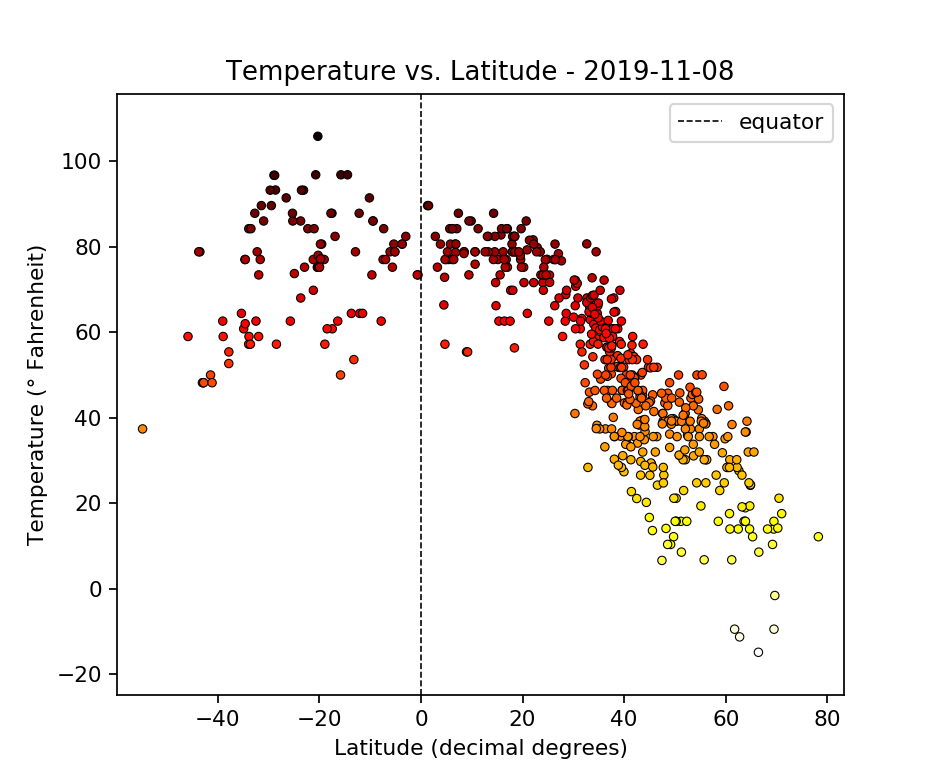

In [10]:
cm = plt.get_cmap("hot_r")
fig = plt.figure(figsize=(6,5))
temp_scatter = plt.scatter(data_df['lat'],data_df['main_temp'], marker='o', s=15, c=data_df['main_temp'], cmap=cm, edgecolors='k',linewidths=0.5)
temp_scatter = plt.xlim((data_df['lat'].min()-5),(data_df['lat'].max()+5))
temp_scatter = plt.ylim((data_df['main_temp'].min()-10),(data_df['main_temp'].max()+10))
temp_scatter = plt.title(f'Temperature vs. Latitude - {analysis_date}')
temp_scatter = plt.vlines(0,(data_df['main_temp'].min()-10),(data_df['main_temp'].max()+10),colors='k',linestyles='dashed',linewidths=0.75,label='equator')
temp_scatter = plt.legend()
degree_sign= u'\N{DEGREE SIGN}'
temp_scatter = plt.xlabel(f'Latitude (decimal degrees)')
temp_scatter = plt.ylabel(f'Temperature ({degree_sign} Fahrenheit)')
temp_scatter = plt.tight_layout

plt.savefig('temp_lat_ZM.png')
plt.show()

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


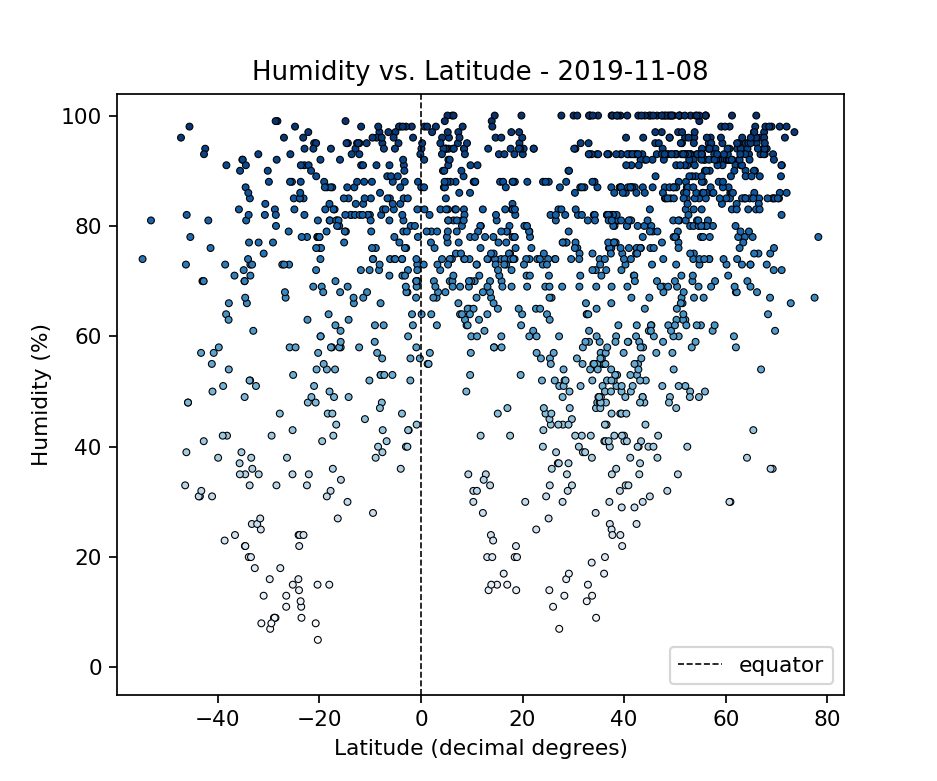

In [19]:
cm2 = plt.get_cmap("Blues")
fig = plt.figure(figsize=(6,5))
temp_scatter = plt.scatter(data_df['lat'], data_df['humidity'], marker='o', s=10, c=data_df['humidity'], cmap=cm2, edgecolors='k',linewidths=0.5)
temp_scatter = plt.xlim((data_df['lat'].min()-5),(data_df['lat'].max()+5))
temp_scatter = plt.ylim(-5,104)
temp_scatter = plt.title(f'Humidity vs. Latitude - {analysis_date}')
temp_scatter = plt.vlines(0,-5,104,colors='k',linestyles='dashed',linewidths=0.75,label='equator')
temp_scatter = plt.legend(loc=4)
temp_scatter = plt.xlabel(f'Latitude (decimal degrees)')
temp_scatter = plt.ylabel(f'Humidity (%)')
temp_scatter = plt.tight_layout

plt.savefig('humidity_lat_ZM.png')
plt.show()

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


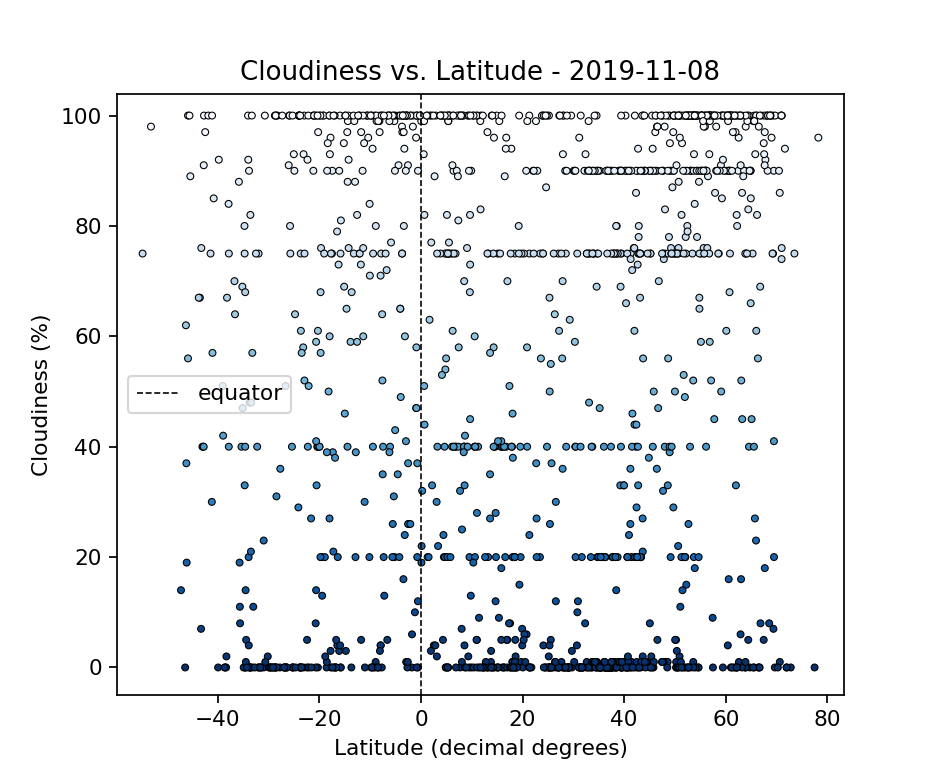

In [22]:
cm3 = plt.get_cmap("Blues_r")
fig = plt.figure(figsize=(6,5))
temp_scatter = plt.scatter(data_df['lat'], data_df['cloudiness'], marker='o', s=10, c=data_df['cloudiness'], edgecolors='k', cmap=cm3, linewidths=0.5)
temp_scatter = plt.xlim((data_df['lat'].min()-5),(data_df['lat'].max()+5))
temp_scatter = plt.ylim(-5,104)
temp_scatter = plt.title(f'Cloudiness vs. Latitude - {analysis_date}')
temp_scatter = plt.vlines(0,-5,104,colors='k',linestyles='dashed',linewidths=0.75,label='equator')
temp_scatter = plt.legend(loc='best')
temp_scatter = plt.xlabel(f'Latitude (decimal degrees)')
temp_scatter = plt.ylabel(f'Cloudiness (%)')
temp_scatter = plt.tight_layout

plt.savefig('cloudiness_lat_ZM.png')
plt.show()

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


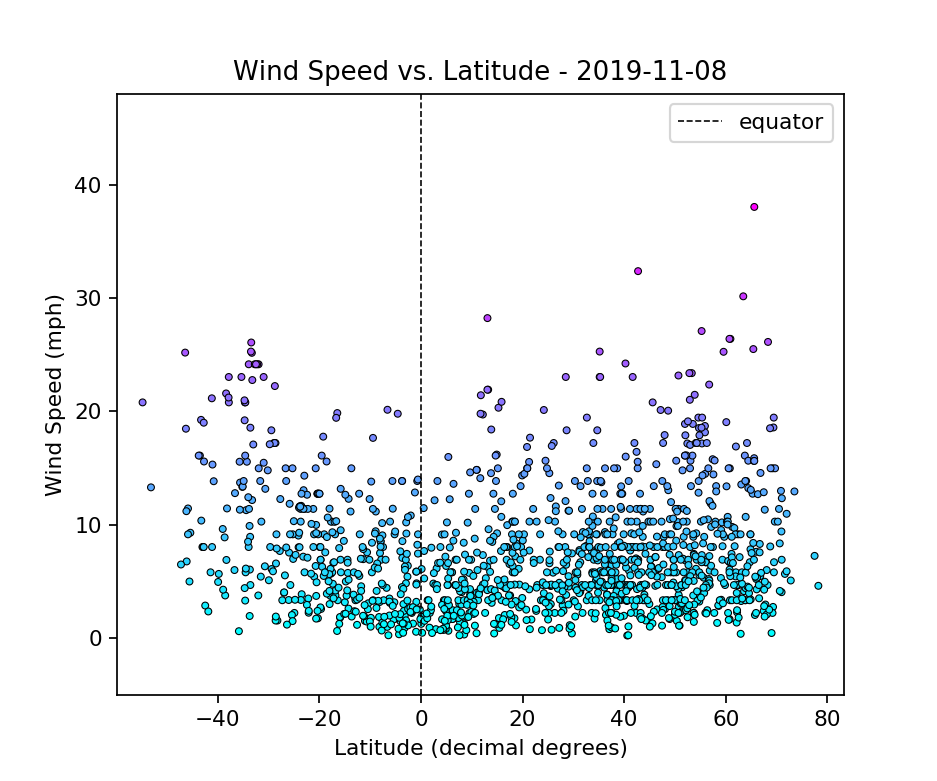

In [23]:
cm4 = plt.get_cmap("cool")
fig = plt.figure(figsize=(6,5))
temp_scatter = plt.scatter(data_df['lat'], data_df['wind_speed'], marker='o', s=10, c=data_df['wind_speed'], cmap=cm4, edgecolors='k',linewidths=0.5)
temp_scatter = plt.xlim((data_df['lat'].min()-5),(data_df['lat'].max()+5))
temp_scatter = plt.ylim(-5,(data_df['wind_speed'].max()+10))
temp_scatter = plt.title(f'Wind Speed vs. Latitude - {analysis_date}')
temp_scatter = plt.vlines(0,-5,(data_df['wind_speed'].max()+10),colors='k',linestyles='dashed',linewidths=0.75,label='equator')
temp_scatter = plt.legend(loc='best')
temp_scatter = plt.xlabel(f'Latitude (decimal degrees)')
temp_scatter = plt.ylabel(f'Wind Speed (mph)')
temp_scatter = plt.tight_layout

plt.savefig('wind_speed_lat_ZM.png')
plt.show()

# Observations

1. Temperature: There appears to be a positive correlation between how close cities are to the equator and higher temperatures. As we are about half way to the winter solstice, cities at corresponding positive and negative latitudes appear to still be experiencing similar temperatures. However, as we move closer to and reach the winter solstice, cities at a negative latitude (that is, in the southern hemisphere) will likely experience higher temperatures than those in the corresponding positive latitudes (northern hemisphere) due to Earth's axis tilt.

2. Humidity: There is an observable relationship between latitude and humidity. It appears that a greater number of cities closer to the equator experience high humidity than those further from the equator. Specifically, cities within the tropic region (23.5 deg. (north) to -23.5 deg. (south)) and sub-tropic regions (30 to -30) experience higher levels of humidity. There is also an appreciable number of cities in the northern hemisphere (50 to 70 deg.) that are experiencing high humidity. This is probably because the northern hemisphere is approaching the winter solstice.

3. Cloudiness and windspeed: Cloudiness does not appear to have a strong relationship with latitude. However, it is interesting to see the banding on the cloudiness chart. The banding shows that cities across particular latitude ranges are experiencing levels of cloudiness from their encompassing weather systems. Windspeed doesn't appear to have a strong relationship with latitude, but the data may indicate that some cities of more extreme latitudes are experiencing higher windspeeds than those if the tropics/subtropics.